In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

First set the folder for input and output

In [19]:
data_folder = "../../../data/"

figures_folder = "../../Figures/WNT/"

sif_output = "../../sif_files/WNT/"

Selecting as resources just Signor

In [3]:
resources = Resources()

In [4]:
resources.import_signor_tsv(data_folder + "signor_db.tsv")

In [5]:
df = resources.interactions

In [6]:
df

,source,target,is_directed,is_stimulation,is_inhibition,form_complex,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources
0,A0A024RAD5,SIGNOR-C535,True,False,False,True,False,False,False,miannu,31831667,SIGNOR-272062
1,A0A0B4J2F0,P18848,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261041
2,A0A0B4J2F0,P35638,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261043
3,A0A0B4J2F0,SIGNOR-PH2,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261042
4,A0AVT1,SIGNOR-C496,True,False,False,True,False,False,False,miannu,24816100,SIGNOR-270835
...,...,...,...,...,...,...,...,...,...,...,...,...
28850,URS000075C808_9606,Q6ZN04,True,True,False,False,False,False,False,miannu,24326307,SIGNOR-272092
28851,URS000075C808_9606,Q86Y13,True,True,False,False,False,False,False,miannu,24326307,SIGNOR-272091
28852,URS000075CF56_9606,P05019,True,False,True,False,False,False,False,miannu,25477897,SIGNOR-255793
28853,URS000075CF56_9606,P23759,True,False,True,False,False,False,False,irozzo,24708856,SIGNOR-256124


In [7]:
# Remove rows where 'source' or 'target' starts with "CHEBI"
filtered_df = df[~(df['source'].str.startswith('CHEBI') | df['target'].str.startswith('CHEBI'))]

In [8]:
filtered_df

,source,target,is_directed,is_stimulation,is_inhibition,form_complex,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources
0,A0A024RAD5,SIGNOR-C535,True,False,False,True,False,False,False,miannu,31831667,SIGNOR-272062
1,A0A0B4J2F0,P18848,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261041
2,A0A0B4J2F0,P35638,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261043
3,A0A0B4J2F0,SIGNOR-PH2,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261042
4,A0AVT1,SIGNOR-C496,True,False,False,True,False,False,False,miannu,24816100,SIGNOR-270835
...,...,...,...,...,...,...,...,...,...,...,...,...
28850,URS000075C808_9606,Q6ZN04,True,True,False,False,False,False,False,miannu,24326307,SIGNOR-272092
28851,URS000075C808_9606,Q86Y13,True,True,False,False,False,False,False,miannu,24326307,SIGNOR-272091
28852,URS000075CF56_9606,P05019,True,False,True,False,False,False,False,miannu,25477897,SIGNOR-255793
28853,URS000075CF56_9606,P23759,True,False,True,False,False,False,False,irozzo,24708856,SIGNOR-256124


Loading the data from Northcott and Lin

In [22]:
data = pd.read_csv(data_folder + "Northcott_Lin_genes.csv")

In [23]:
data

,WNT,SHH,G3,G4
0,CTNNB1,PTCH1,MYC,PRDM6
1,APC,SUFU,SMARCA4,KMT2D
2,CSNK2B,SMO,GFI1B,KMT2C
3,ARID1A,KMT2D,ATM,KDM6A
4,ARID2,KMT2C,PTEN,ZMYM3
5,ATM,CREBBP,KBTBD4,MED12
6,PIK3CA,GSE1,CRX,GFI1B
7,BAI3,BCOR,HLX,MYCN
8,EPHA7,GLI2,IRX6,OTX2
9,DDX3X,TCF4,LHX9,ZIC1


In [24]:
wnt_list = data["WNT"].reset_index(drop=True).to_list()

In [25]:
wnt_list

['CTNNB1',
 'APC',
 'CSNK2B',
 'ARID1A',
 'ARID2',
 'ATM',
 'PIK3CA',
 'BAI3',
 'EPHA7',
 'DDX3X',
 'SYNCRIP',
 'ALX4',
 'DLX3',
 'DLX4',
 'EMX2',
 'EN1',
 'FOXF1',
 'HOMEZ',
 'HOXC4',
 'HOXC5',
 'HOXD11',
 'HOXD13',
 'HOXD8',
 'HOXD9',
 'IRX2',
 'IRX5',
 'LEF1',
 'LHX8',
 'MAF',
 'MSX2',
 'NKX6-1',
 'ONECUT2',
 'OSR2',
 'PAX3',
 'PITX1',
 'PRRX1',
 'RUNX2',
 'SHOX2']

# Creating a Network starting from All Omnipath interactions

In [26]:
wnt_net = Network(wnt_list, resources = filtered_df)

Error: node BAI3 is not present in the resources database
Error: node DLX4 is not present in the resources database
Error: node HOMEZ is not present in the resources database
Error: node HOXC5 is not present in the resources database
Error: node HOXD8 is not present in the resources database
Error: node ONECUT2 is not present in the resources database
Error: node OSR2 is not present in the resources database
Error: node SHOX2 is not present in the resources database


Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [29]:
wnt_net.add_node("ADGRB3")

Error: node ADGRB3 is not present in the resources database


In [30]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,CTNNB1,P35222,NaN
1,APC,P25054,NaN
2,CSNK2B,P67870,NaN
3,ARID1A,O14497,NaN
4,ARID2,Q68CP9,NaN
5,ATM,Q13315,NaN
6,PIK3CA,P42336,NaN
7,EPHA7,Q15375,NaN
8,DDX3X,O00571,NaN
9,SYNCRIP,O60506,NaN


In [35]:
%%time
wnt_net.complete_connection(maxlen=4, algorithm="dfs", only_signed=True, connect_with_bias=False, consensus=False)

CPU times: user 22.2 s, sys: 91 µs, total: 22.2 s
Wall time: 22.2 s


In [36]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,CTNNB1,P35222,NaN
1,APC,P25054,NaN
2,CSNK2B,P67870,NaN
3,ARID1A,O14497,NaN
4,ARID2,Q68CP9,NaN
...,...,...,...
104,FGF8,P55075,NaN
105,MYOD1,P15172,NaN
106,CCL5,P13501,NaN
107,CCR3,P51677,NaN


In [37]:
wnt_net.edges

,source,target,Type,Effect,References
0,P25054,P35222,None,inhibition,22083140; 22083140; 22083140
1,P67870,P35222,None,stimulation,12432063; 12432063; 12432063
2,Q13315,P16220,None,inhibition,15073328; 15073328; 15073328
3,P16220,P35222,None,stimulation,10775268; 10775268; 10775268
4,Q13315,P31749,None,inhibition,18534819; 18534819; 18534819
...,...,...,...,...,...
330,P17252,P19174,None,inhibition,1370476
331,P17252,Q13131,None,inhibition,27784766
332,P17252,P15172,None,inhibition,1335366
333,P43405,P19174,None,stimulation,8657103


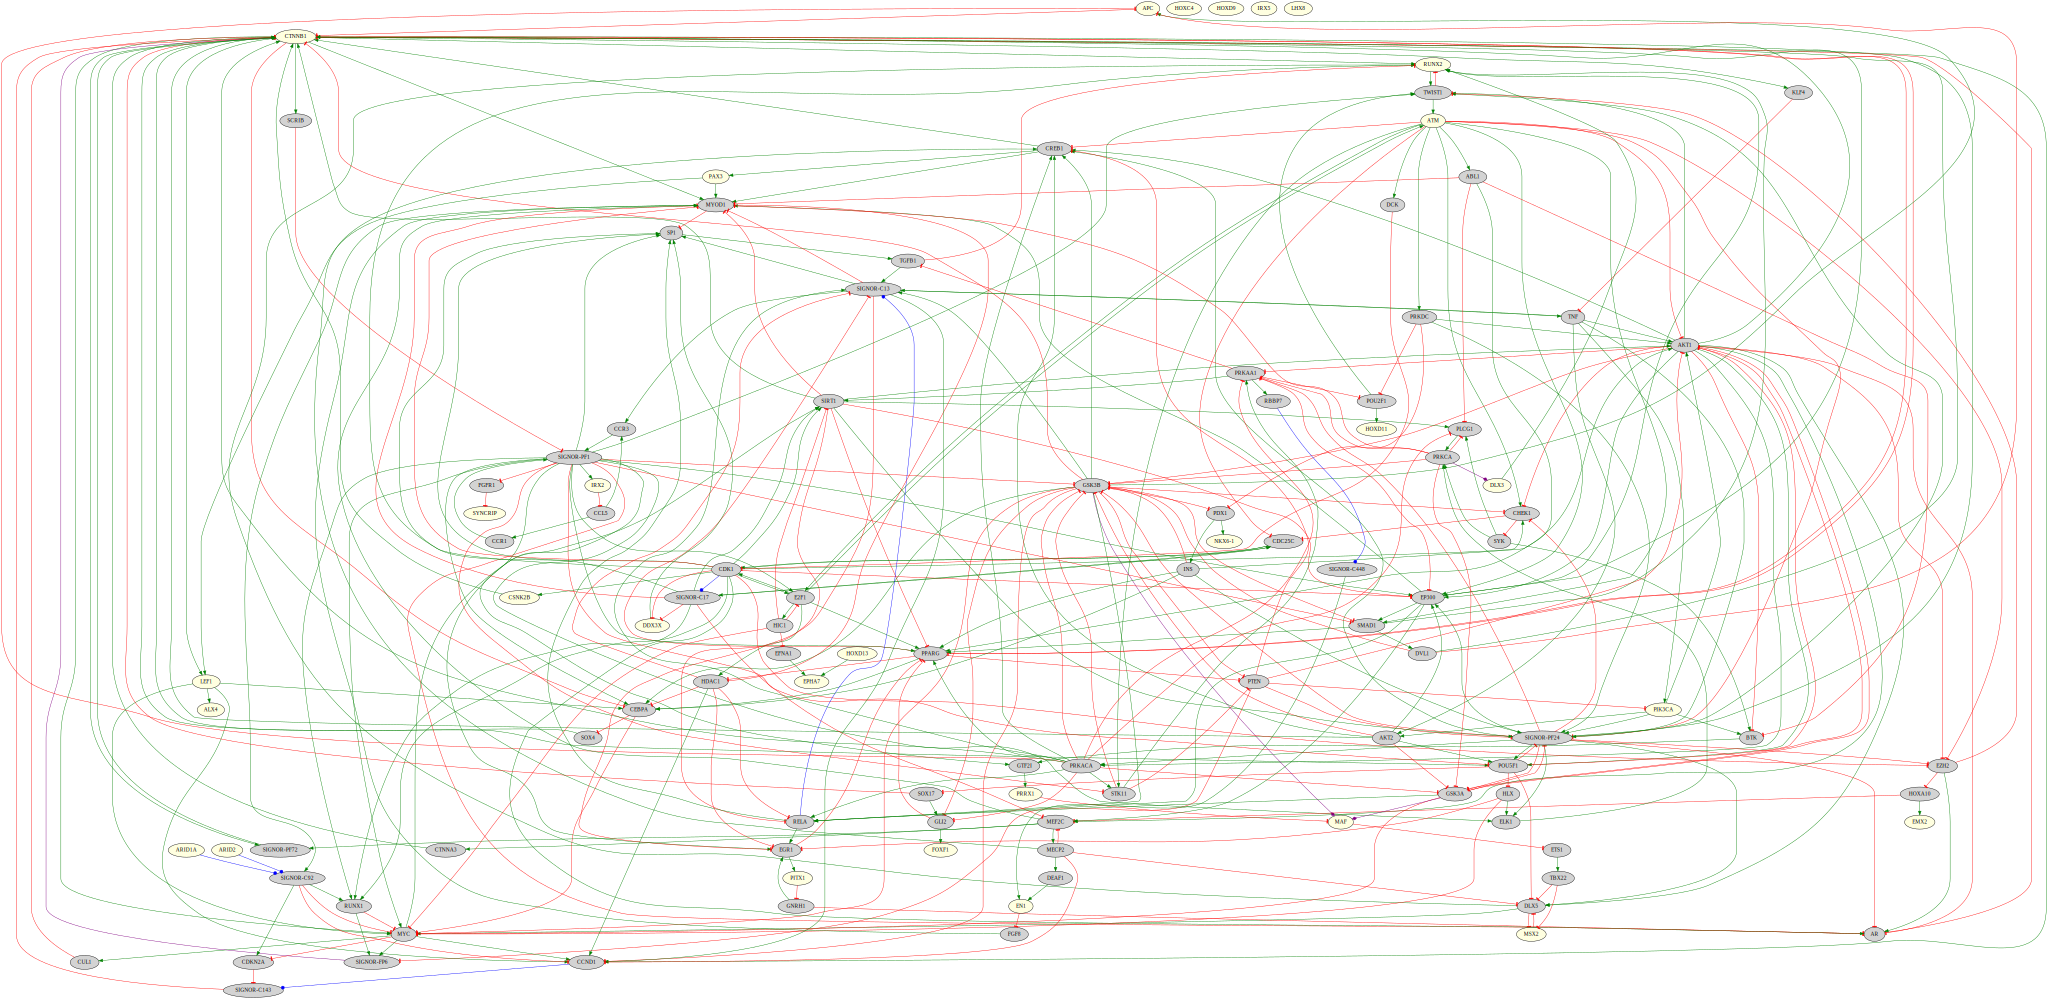

In [38]:
wnt_visualizer = NetworkVisualizer(wnt_net,color_by='effect', noi=True)
output = figures_folder + "WNT_signor_northcott"
wnt_visualizer.render(output_file=output)

# Exporting Network in sif file

In order to export a fully connected network in sif file, I remove the nodes that are not connected

In [39]:
from neko._outputs.exports import Exports

In [40]:
for node in wnt_net.nodes["Uniprot"]:
    if node not in wnt_net.edges["source"].values and node not in wnt_net.edges["target"].values:
        node = wnt_net.nodes[ wnt_net.nodes["Uniprot"] == node]["Genesymbol"].values
        print( node)
        wnt_net.remove_node(node[0])

['HOXC4']
['HOXD9']
['IRX5']
['LHX8']


In [41]:
export = Exports(wnt_net)

In [42]:
export.export_sif(sif_output + "WNT_signor_Northcott.sif")